# K-means Exercise: Credit Cards

In [1]:
from sklearn.cluster import KMeans  #algorithm in sklearn library to do k-means clustering

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [2]:
#use dataset with
location = "../datasets/CC_GENERAL.csv"
df = pd.read_csv(location)

#in this dataframe, features 1 & 2 are the characteristics of each data point (predictive features) 
#C is the target variable (categories to predict)
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [3]:
#drop a row with missing value 
df.dropna(axis=0, inplace=True)

In [4]:
df.keys()

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [5]:
modeldf = df.drop(['CUST_ID',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX','BALANCE_FREQUENCY', 'TENURE', 'PRC_FULL_PAYMENT','CASH_ADVANCE'], axis=1)

In [6]:
modeldf.head()

,BALANCE,PURCHASES,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS
0,40.900749,95.40,1000.0,201.802084,139.509787
1,3202.467416,0.00,7000.0,4103.032597,1072.340217
2,2495.148862,773.17,7500.0,622.066742,627.284787
4,817.714335,16.00,1200.0,678.334763,244.791237
5,1809.828751,1333.28,1800.0,1400.057770,2407.246035


In [7]:
modeldf.describe()

,BALANCE,PURCHASES,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS
count,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000
mean,1601.224893,1025.433874,4522.091030,1784.478099,864.304943
std,2095.571300,2167.107984,3659.240379,2909.810090,2372.566350
min,0.000000,0.000000,50.000000,0.049513,0.019163
25%,148.095189,43.367500,1600.000000,418.559237,169.163545
50%,916.855459,375.405000,3000.000000,896.675701,312.452292
75%,2105.195853,1145.980000,6500.000000,1951.142090,825.496463
max,19043.138560,49039.570000,30000.000000,50721.483360,76406.207520


In [8]:
#total missing values
modeldf.isnull().sum()

BALANCE             0
PURCHASES           0
CREDIT_LIMIT        0
PAYMENTS            0
MINIMUM_PAYMENTS    0
dtype: int64

In [9]:
#make a dataframe called X to hold the predictive features
X = modeldf.drop('CREDIT_LIMIT', axis=1)
X.head()

,BALANCE,PURCHASES,PAYMENTS,MINIMUM_PAYMENTS
0,40.900749,95.40,201.802084,139.509787
1,3202.467416,0.00,4103.032597,1072.340217
2,2495.148862,773.17,622.066742,627.284787
4,817.714335,16.00,678.334763,244.791237
5,1809.828751,1333.28,1400.057770,2407.246035


Text(0, 0.5, 'BALANCE')

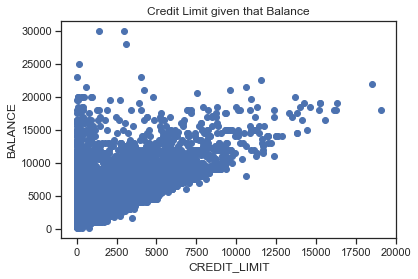

In [10]:
#plot data points to visually see where they are
#on small and distinctive dataset, easier to see clusters
import seaborn as sns; sns.set(style="ticks", color_codes=True)
plt.scatter(modeldf['BALANCE'],modeldf['CREDIT_LIMIT'])
plt.title('Credit Limit given that Balance')
plt.xlabel('CREDIT_LIMIT')
plt.ylabel('BALANCE')


In [11]:
#initialize k-means function
#set number of clusters to categorize = 4
kmeans = KMeans(n_clusters=4)

#the model will learn which data points seem similar
#calculates centroids
#classfies data points in clusters based on distance to centroids
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [12]:
#add a new column to dataframe called "cluster"
#can use this toompare features of clusters to original categories
modeldf['cluster'] = kmeans.labels_

In [13]:
modeldf['cluster'].unique()

array([0, 2, 1, 3], dtype=int64)

In [14]:
#dataframe of one column
#holds target variable "category"
y = modeldf['cluster'].copy()
y.head()

0    0
1    2
2    0
4    0
5    0
Name: cluster, dtype: int32

In [15]:
#data point coordinates for centroids of each cluster
#index 0 is blue cluster
#index 1 is yellow cluster
#index 2 is purple cluster
#index 3 is red cluster
print(kmeans.cluster_centers_)

[[  865.62856438   651.5730663   1007.48392232   437.0269318 ]
 [ 4692.50111424  1294.75657895  2031.74817384 27540.84737316]
 [ 4469.78159949  1906.73503117  3859.44328166  1973.73151622]
 [ 4539.13948255 10918.30732759 19082.11200655  2119.38532798]]


In [16]:
modeldf.head()

,BALANCE,PURCHASES,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,cluster
0,40.900749,95.40,1000.0,201.802084,139.509787,0
1,3202.467416,0.00,7000.0,4103.032597,1072.340217,2
2,2495.148862,773.17,7500.0,622.066742,627.284787,0
4,817.714335,16.00,1200.0,678.334763,244.791237,0
5,1809.828751,1333.28,1800.0,1400.057770,2407.246035,0


Text(0, 0.5, 'PURCHASES')

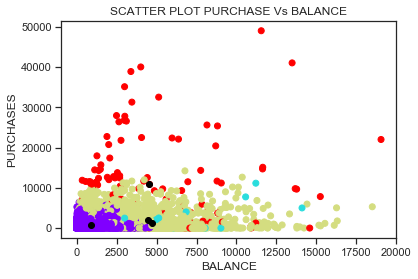

In [17]:
#scatterplot of k-means predicted clusters with calculated centroids

#k-means predicted clusters for the original data features
plt.scatter(modeldf['BALANCE'],modeldf['PURCHASES'], c=modeldf['cluster'], cmap= 'rainbow')

#plot x, y axis coordinates for centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='black')
plt.title('SCATTER PLOT PURCHASE Vs BALANCE')
plt.xlabel('BALANCE')
plt.ylabel('PURCHASES')


In [18]:
#predict category of new data point
kpred = [50,50,50,50]

#model thinks new data point belongs to upper-left cluster
print(kmeans.predict([kpred]))

[0]


Text(0, 0.5, 'PURCHASES')

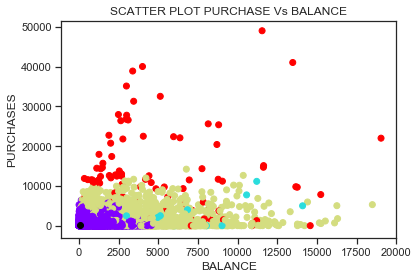

In [19]:
#see plot of new data point

#k-means predicted clusters (in color) for the data points
plt.scatter(modeldf['BALANCE'],modeldf['PURCHASES'], c=modeldf['cluster'], cmap= 'rainbow')

#new data point is the black dot
plt.scatter(kpred[0],kpred[1],c='black')

plt.title('SCATTER PLOT PURCHASE Vs BALANCE')
plt.xlabel('BALANCE')
plt.ylabel('PURCHASES')

In [20]:
from sklearn import datasets

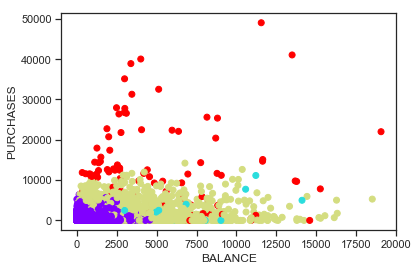

In [21]:
#plot iris species by sepal width vs length

#purple cluster is setosa
#green cluster is versicolor
#red cluster is virginica
plt.xlabel('BALANCE')
plt.ylabel('PURCHASES')
plt.scatter(modeldf['BALANCE'], modeldf['PURCHASES'], c=modeldf['cluster'], cmap='rainbow')

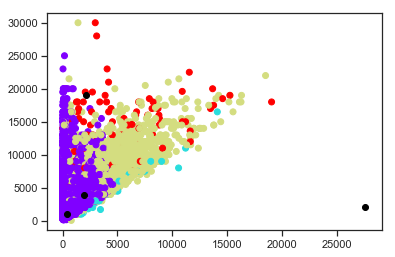

In [22]:
#scatterplot of k-means predicted clusters with calculated centroids

#k-means predicted clusters for the original data features
plt.scatter(modeldf['BALANCE'],modeldf['CREDIT_LIMIT'], 
            c=modeldf['cluster'], cmap= 'rainbow')
#plt.scatter(modeldf['PURCHASES'],modeldf['CASH_ADVANCE'], 
          #  c=modeldf['cluster'], cmap= 'rainbow')
#plot x, y axis coordinates for centroids
plt.scatter(kmeans.cluster_centers_[:,3], kmeans.cluster_centers_[:,2], c='black')